In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
sort_names = [
        "Selection sort", "Insertion sort", "Bubble sort",
        "Shaker sort", "Shell sort",
        "Heap sort", "Merge sort", "Quick sort",
        "Counting sort", "Radix sort", "Flash sort"
    ]
data_order = [
        "Randomized",
        "Sorted",
        "Reversed",
        "Nearly sorted"
    ]
input_sizes = [10000, 30000, 50000, 100000, 300000, 500000]

### Read file csv

#### Lưu ý đổi đường dẫn thư mục mới có thể chạy được

In [3]:
sort_data = []
for i in range(11):
    myFile = "output/output " + sort_names[i] + ".csv"
    df = pd.read_csv(myFile)
    sort_data.append(df)
sort_data[0]

,Data size,Name algorithm,Data order,Running time,Comparisons
0,10000,Selection sort,Randomized,0.160072,100019998
1,10000,Selection sort,Sorted,0.157444,100019998
2,10000,Selection sort,Reversed,0.156220,100019998
3,10000,Selection sort,Nearly sorted,0.152027,100019998
4,30000,Selection sort,Randomized,1.383750,900059998
5,30000,Selection sort,Sorted,1.371480,900059998
6,30000,Selection sort,Reversed,1.373160,900059998
7,30000,Selection sort,Nearly sorted,1.371500,900059998
8,50000,Selection sort,Randomized,3.908830,2500099998
9,50000,Selection sort,Sorted,3.838080,2500099998


### Filter data for running time

In [4]:
running_time_filtered = []
for _type in data_order:
    table = []
    for i in range(11):
        df = sort_data[i]
        _type_data_order = df[df["Data order"] == _type]
        entry = {}
        entry["Name algorithm"] = sort_names[i]
        for _size in input_sizes:
            raw_data = _type_data_order[_type_data_order["Data size"] == _size]
            entry[str(_size)] = raw_data["Running time"].values[0]
        entry["Data order"] = _type
        table.append(entry)
    running_time_filtered.append(pd.DataFrame(table))
running_time_filtered[0]

,Name algorithm,10000,30000,50000,100000,300000,500000,Data order
0,Selection sort,0.160072,1.383750,3.908830,15.427400,169.925000,402.729000,Randomized
1,Insertion sort,0.015882,0.133727,0.397715,1.715410,15.811800,55.404700,Randomized
2,Bubble sort,0.268950,2.686420,8.156500,30.853800,277.519000,773.650000,Randomized
3,Shaker sort,0.269129,2.546770,7.412340,29.957500,270.800000,930.801000,Randomized
4,Shell sort,0.001503,0.004626,0.006408,0.016343,0.057619,0.092058,Randomized
5,Heap sort,0.000802,0.004132,0.004924,0.013370,0.052706,0.138432,Randomized
6,Merge sort,0.006089,0.028536,0.037824,0.054960,0.260414,0.383066,Randomized
7,Quick sort,0.001383,0.003320,0.005251,0.011212,0.048287,0.132994,Randomized
8,Counting sort,0.000329,0.001988,0.001333,0.004192,0.016295,0.026976,Randomized
9,Radix sort,0.000629,0.002060,0.003999,0.008252,0.022168,0.056215,Randomized


### Filter data for comparisons

In [8]:
comparisons_filtered = []
for _type in data_order:
    table = []
    for i in range(11):
        df = sort_data[i]
        _type_data_order = df[df["Data order"] == _type]
        entry = {}
        entry["Name algorithm"] = sort_names[i]
        for _size in input_sizes:
            raw_data = _type_data_order[_type_data_order["Data size"] == _size]
            entry[str(_size)] = raw_data["Comparisons"].values[0]
        entry["Data order"] = _type
        table.append(entry)
    comparisons_filtered.append(pd.DataFrame(table))
comparisons_filtered[0]

,Name algorithm,10000,30000,50000,100000,300000,500000,Data order
0,Selection sort,100019998,900059998,2500099998,10000199998,90000599998,250000999998,Randomized
1,Insertion sort,50258848,450753951,1254687888,5017032819,45033334887,125150641269,Randomized
2,Bubble sort,100009999,900029999,2500049999,10000099999,90000299999,250000499999,Randomized
3,Shaker sort,67046847,601287285,1674719206,6687790327,60034741593,166894524549,Randomized
4,Shell sort,407729,1341751,2567546,5880567,20020053,36191258,Randomized
5,Heap sort,637775,2150592,3771140,8044792,26490297,45969706,Randomized
6,Merge sort,337226,1104458,1918922,4037850,13051418,22451418,Randomized
7,Quick sort,279033,945002,1585467,3386422,10434431,18127223,Randomized
8,Counting sort,50004,150004,250004,500004,1500004,2500004,Randomized
9,Radix sort,140058,510072,850072,1700072,5100072,8500072,Randomized


In [62]:
def plot_data_order(df, input_sizes, sort_names):

    fontdict_ticklabel = {
        'family': 'serif',  # or 'sans-serif' for sans-serif fonts
        'size': '10',       # you can adjust the size accordingly
        'weight': 'normal',
        'style': 'italic'
    }

    fontdict_label = {
        'family': 'serif',  # or 'sans-serif' for sans-serif fonts
        'size': '13',       # you can adjust the size accordingly
        'weight': 'normal',
        'style': 'italic'
    }

    fontdict_title = {
        'family': 'serif',  # or 'sans-serif' for sans-serif fonts
        'size': '16',       # you can adjust the size accordingly
        'weight': 'normal',
        'style': 'italic'
    }

    input_sizes_str = [str(i) for i in input_sizes]
    running_time_data = df[input_sizes_str].values.tolist()
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']

    # Creating the plot
    plt.figure(figsize=(10, 6))

    # Plotting the data
    xpos = [100000*i for i in range(6)]
    y_max = max(max(running_time_data))
    len_number = math.floor(math.log10(y_max))
    y_max = math.floor(math.ceil(y_max*1.0/(10**len_number)))*(10**len_number)
    ypos = [100*i for i in range(y_max//100 + 1)]
    for i in range(11):
        running_time = running_time_data[i]
        plt.plot(xpos, running_time, marker='o', linestyle='-', color=colors[i], label=sort_names[i])

    # Setting the x and y axis labels with more space
    plt.xticks(xpos, labels = input_sizes, fontdict= fontdict_ticklabel)
    plt.yticks(ypos, labels = ypos, fontdict= fontdict_ticklabel)

    # Adding the title and labels
    plt.title(df["Data order"].values[0] + " Input", fontdict = fontdict_title)
    plt.xlabel('Input size', fontdict = fontdict_label)
    plt.ylabel('Running time in seconds', fontdict= fontdict_label)

    # Adding the legend below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, prop = fontdict_ticklabel)

    # Adjust layout to make room for the legend below the plot
    plt.tight_layout()

     #Save image
    plt.savefig(df["Data order"].values[0] + ' Running time Input' + '.png', dpi = 300)

    # Show the plot
    plt.show()

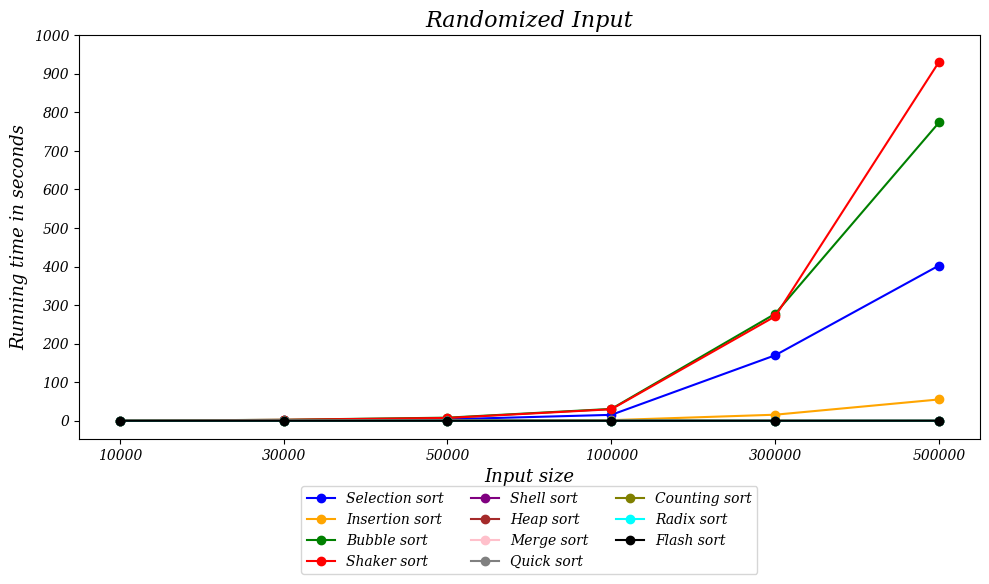

In [63]:
plot_data_order(running_time_filtered[0], input_sizes, sort_names)

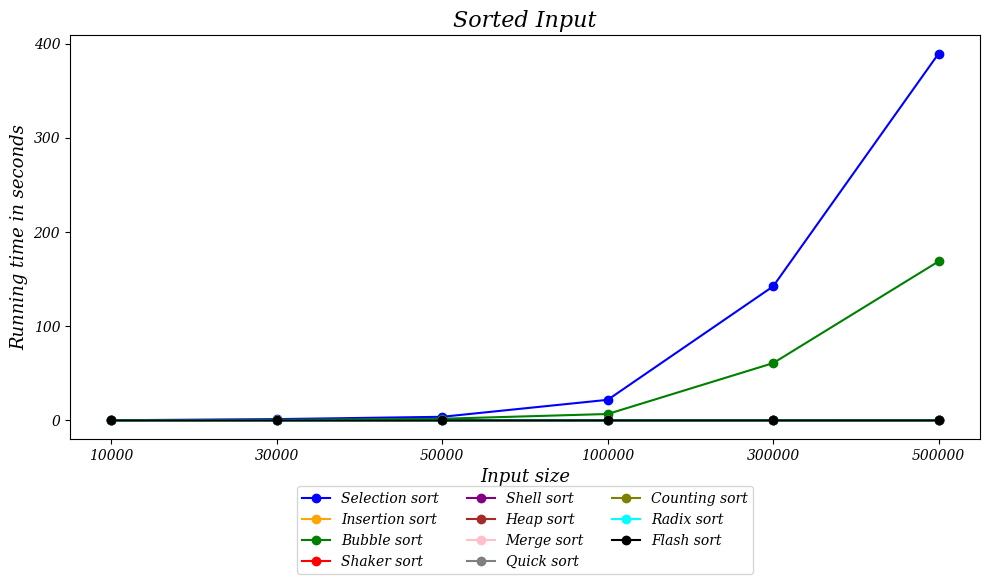

In [64]:
plot_data_order(running_time_filtered[1], input_sizes, sort_names)

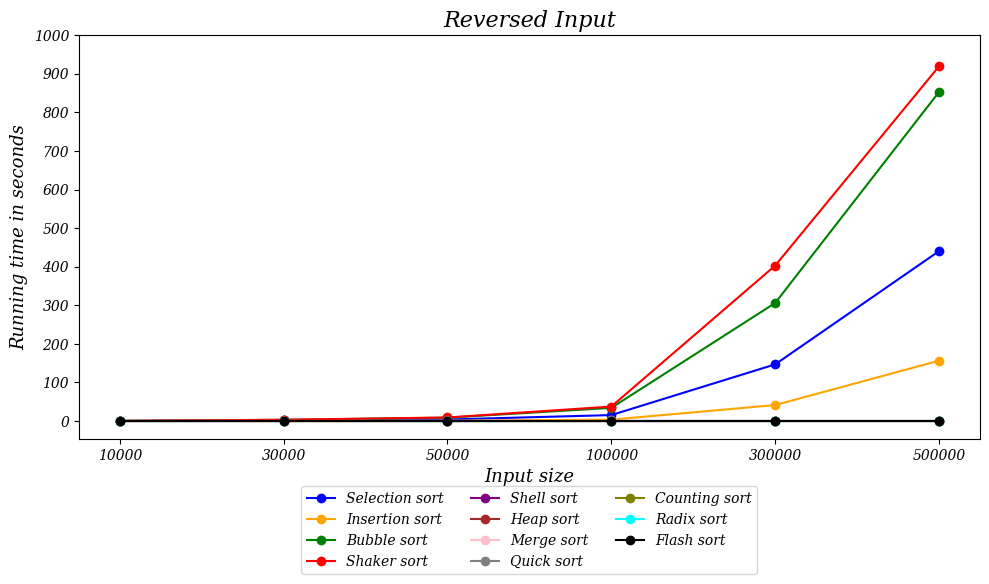

In [65]:
plot_data_order(running_time_filtered[2], input_sizes, sort_names)

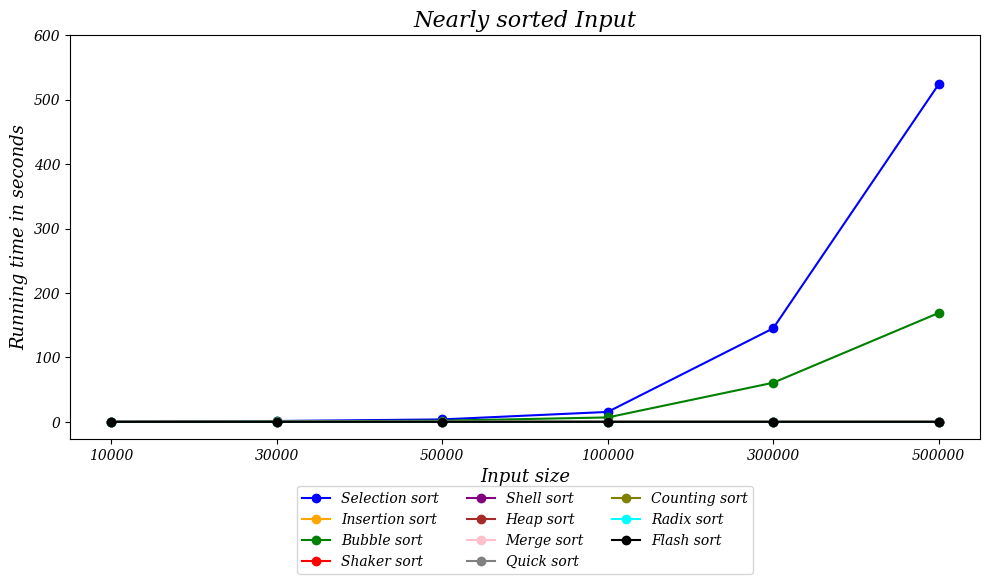

In [66]:
plot_data_order(running_time_filtered[3], input_sizes, sort_names)

In [67]:
def plot_comparisons(df):
    elements = [100000, 300000, 500000]
    algorithms = ['Selection Sort', 'Insertion Sort', 'Bubble Sort', 'Shaker Sort', 'Shell Sort',
                  'Heap Sort', 'Merge Sort', 'Quick Sort', 'Counting Sort', 'Radix Sort', 'Flash Sort']

    comparisons = np.array(df[[str(i) for i in elements]].values.tolist())

    # Adjusting figure size and plot layout
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')


    colors = ['#0080FF', '#FF9933', '#A0A0A0']

    dx, dy = 0.8, 0.2
    gap = 1.5

    # Plotting each bar with better spacing
    xpos = [gap*j for j in range(len(algorithms))]
    xpos = np.array(xpos)

    for i, elem in enumerate(elements):
        dz = comparisons.T[i]
        ypos = [i] * len(algorithms)
        ax.bar3d(xpos, ypos, np.zeros_like(xpos), dx, dy, dz, color=colors[i])

    # Setting the x and y axis labels with more space
    fontdict_ticklabel = {
        'family': 'serif',  # or 'sans-serif' for sans-serif fonts
        'size': '10',       # you can adjust the size accordingly
        'weight': 'normal',
        'style': 'italic'
    }

    fontdict_label = {
        'family': 'serif',  # or 'sans-serif' for sans-serif fonts
        'size': '13',       # you can adjust the size accordingly
        'weight': 'normal',
        'style': 'italic'
    }

    fontdict_title = {
        'family': 'serif',  # or 'sans-serif' for sans-serif fonts
        'size': '16',       # you can adjust the size accordingly
        'weight': 'normal',
        'style': 'italic'
    }

    ax.set_xticks(xpos - (gap - dx)/2)
    ax.set_xticklabels(algorithms, fontdict=fontdict_ticklabel, rotation=55, ha='center', va='top')
    ax.set_yticks(np.arange(len(elements)))
    ax.set_yticklabels(elements, fontdict=fontdict_ticklabel, ha='left', va='bottom')
    ax.set_zticks([0, 5E+10, 1E+11, 1.5E+11, 2E+11, 2.5E+11, 3E+11])
    ax.set_zticklabels(["0", "5E+10", "1E+11", "1.5E+11", "2E+11", "2.5E+11", "3E+11"], fontdict=fontdict_ticklabel, ha='left', va='bottom')

    # Labeling the axes with more space for 'Algorithm' label
    ax.set_xlabel('Algorithm', labelpad=60, fontdict=fontdict_label)
    ax.set_zlabel('Comparisons', labelpad=50, fontdict=fontdict_label)

    # Set the background color of the grid using the updated properties
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True

    ax.xaxis.pane.set_facecolor((1, 1, 1, 0.05))
    ax.yaxis.pane.set_facecolor((1, 1, 1, 0.05))
    ax.zaxis.pane.set_facecolor((1, 1, 1, 0.05))

    # Setting the title of the plot
    ax.text2D(0.5, 0.8, df["Data order"].values[0] + ' Input', transform=ax.transAxes, ha='center', va='center', fontdict=fontdict_title)
    # Adjusting the view angle for better readability
    ax.view_init(elev=7, azim=-89)

    #Save image
    plt.savefig(df["Data order"].values[0] + ' Comparisons Input' + '.png', dpi = 300, bbox_inches='tight')

    # Displaying the plot
    plt.show()


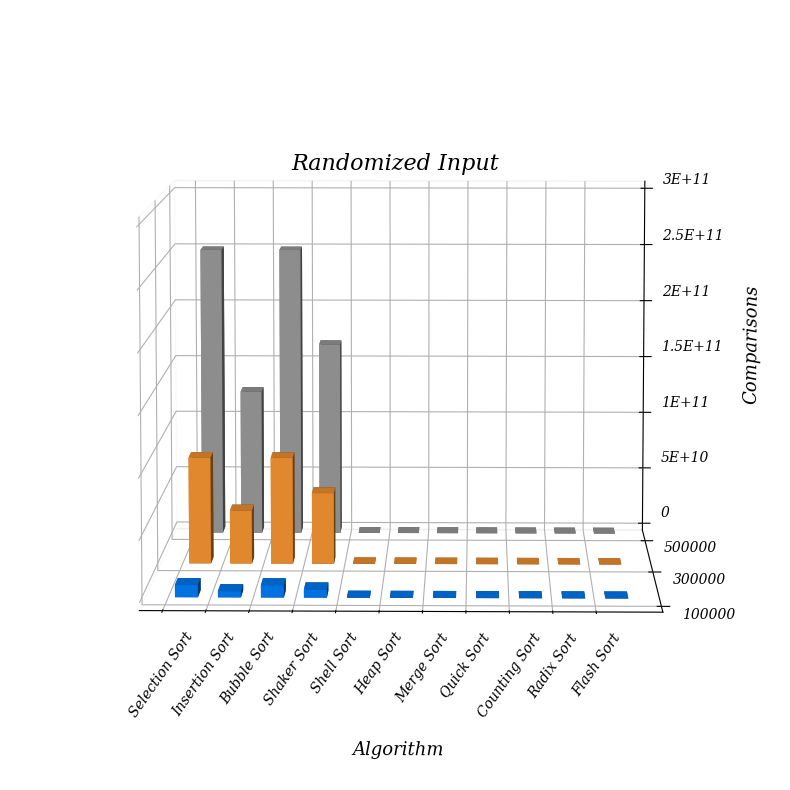

In [68]:
plot_comparisons(comparisons_filtered[0])

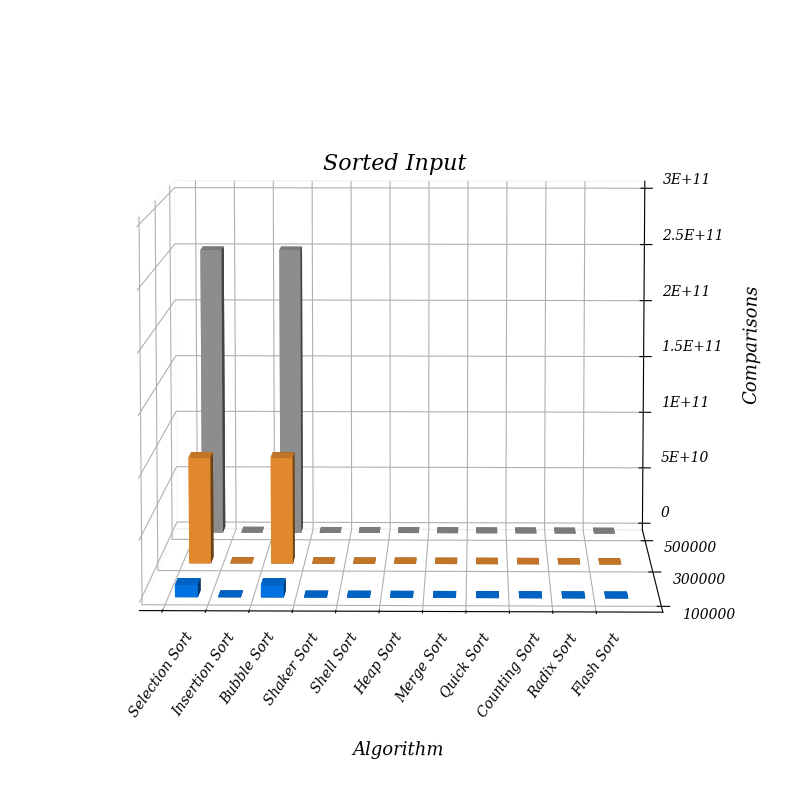

In [ ]:
plot_comparisons(comparisons_filtered[1])

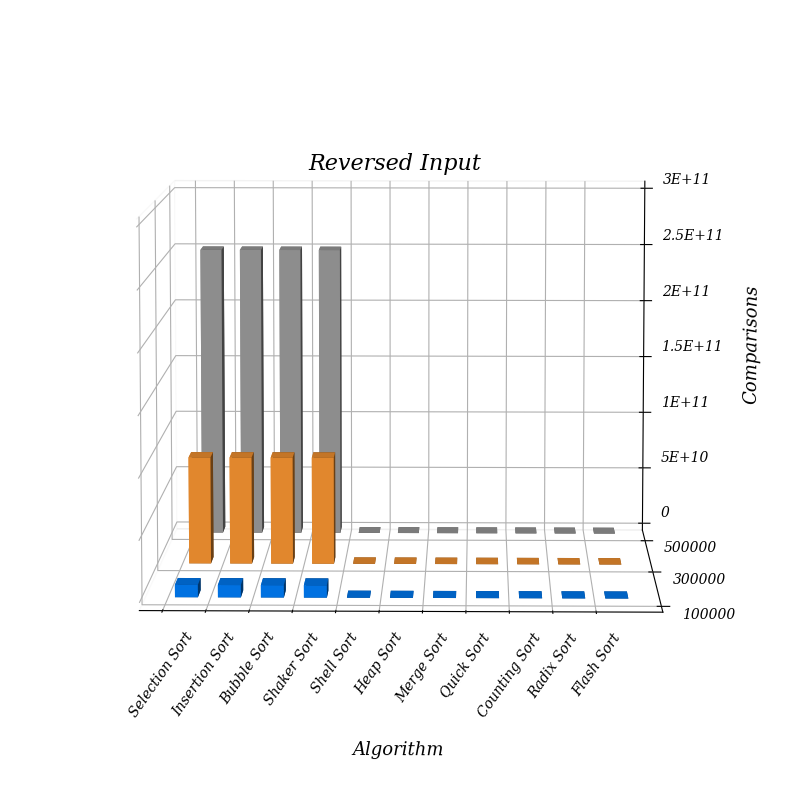

In [ ]:
plot_comparisons(comparisons_filtered[2])

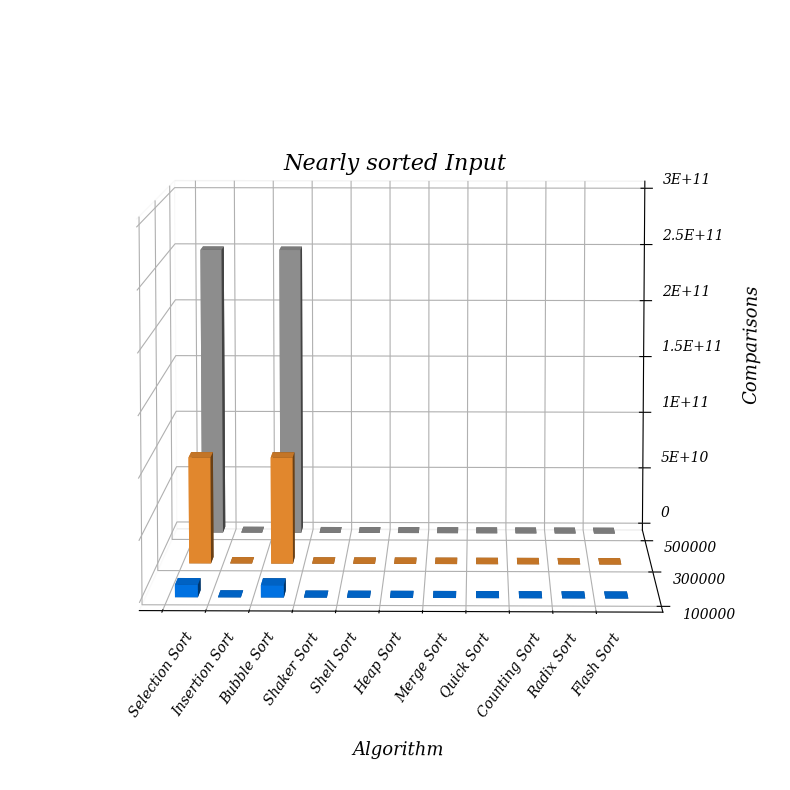

In [ ]:
plot_comparisons(comparisons_filtered[3])